In [ ]:
!pip install scikit-learn matplotlib joblib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

**Choose dataset**

In [2]:
USE_MNIST = False  # False = sklearn.load_digits (fast), True = MNIST (large, downloads ~50MB)
#USE_MNIST = True (Use it to downloads ~50MB from OpenML )

if not USE_MNIST:
    digits = load_digits()
    X, y = digits.data, digits.target
    image_shape = (8, 8)
    print("Dataset: sklearn.load_digits", X.shape)
else:
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data.astype(np.float32), mnist.target.astype(int)
    image_shape = (28, 28)
    print("Dataset: MNIST", X.shape)

Dataset: sklearn.load_digits (1797, 64)


**Train-Test Split**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Pipeline: Scale → PCA → kNN**

In [4]:

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),  # keep 95% variance
    ("knn", KNeighborsClassifier(n_neighbors=3))
])


**Train**

In [5]:

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

**Predict**

In [6]:
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9694
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.97      0.97        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.97      0.97      0.97        36
           8       0.97      0.89      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



**Confusion Matrix**

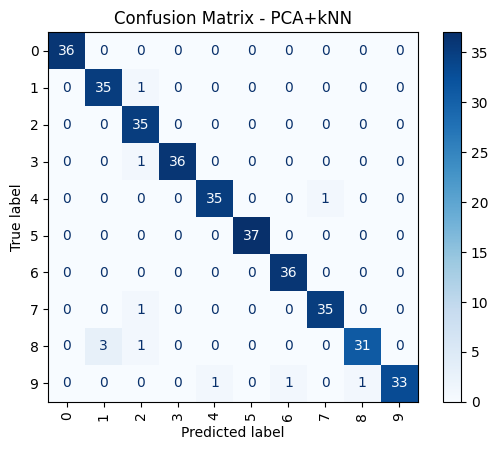

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix - PCA+kNN")
plt.show()


**Explained variance**

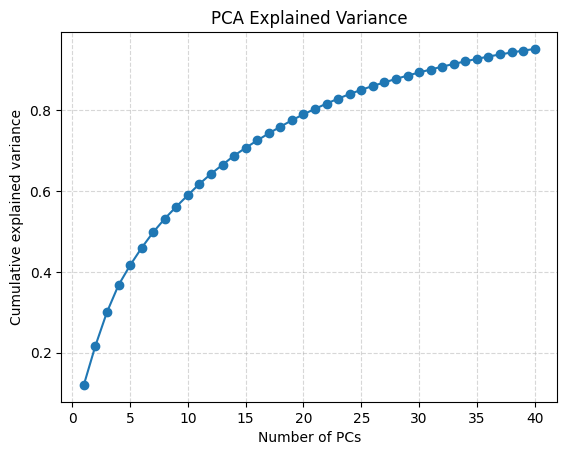

In [8]:
pca_model = pipe.named_steps["pca"]
cumsum = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot(np.arange(1, len(cumsum)+1), cumsum, marker="o")
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Explained Variance")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

 **Visualize top PCs**

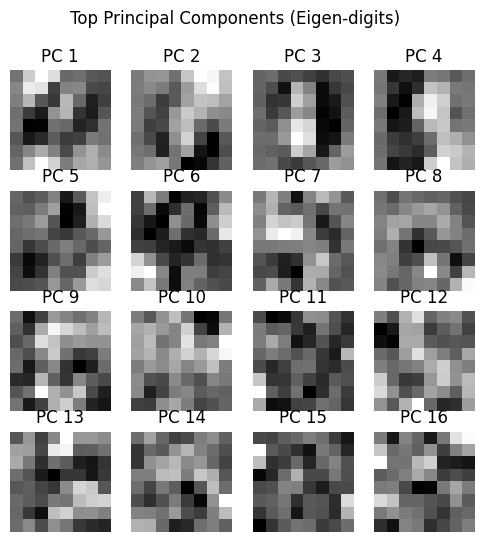

In [9]:
n_show = 16
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.ravel()):
    if i < pca_model.components_.shape[0]:
        ax.imshow(pca_model.components_[i].reshape(image_shape), cmap="gray")
        ax.set_title(f"PC {i+1}")
        ax.axis("off")
plt.suptitle("Top Principal Components (Eigen-digits)")
plt.show()
